In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df['label']
y = y.values
X = df.drop(['label'], axis=1)

In [5]:
X=X.values
X = X.reshape(X.shape[0], 28,28,1)
X.shape

(42000, 28, 28, 1)

In [6]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [7]:
y=to_categorical(y)

In [8]:
y.shape

(42000, 10)

In [9]:
X=X/255

In [10]:
from keras import Sequential
from keras.layers import Flatten,Dense,Activation,Dropout,Conv2D, MaxPool2D 

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=.3)

In [13]:
print('X train', X_train.shape)
print('Y train', y_train.shape)
print('X val', X_val.shape)
print('Y val', y_val.shape)

X train (29400, 28, 28, 1)
Y train (29400, 10)
X val (12600, 28, 28, 1)
Y val (12600, 10)


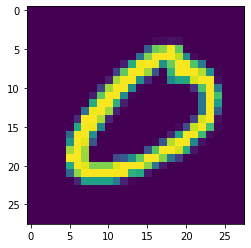

In [43]:
plt.imshow(X_train[5][:,:,0])

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)
val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)
train_generator.fit(X_train)
val_generator.fit(X_val)

In [16]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding="valid", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="valid", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit_generator(train_generator.flow(X_train, y_train, batch_size= 256),epochs = 10, steps_per_epoch = X_train.shape[0]//256, validation_data = val_generator.flow(X_val, y_val, batch_size = 256), validation_steps = 250, verbose = 1)

Epoch 1/10
114/114 [==============================] - 627s 6s/step - loss: 0.6356 - accuracy: 0.7875 - val_loss: 0.2129 - val_accuracy: 0.9239
Epoch 2/10
114/114 [==============================] - 415s 4s/step - loss: 0.1949 - accuracy: 0.9389 - val_loss: 0.1141 - val_accuracy: 0.9625
Epoch 3/10
114/114 [==============================] - 351s 3s/step - loss: 0.1218 - accuracy: 0.9622 - val_loss: 0.2510 - val_accuracy: 0.9730
Epoch 4/10
114/114 [==============================] - 346s 3s/step - loss: 0.0946 - accuracy: 0.9705 - val_loss: 0.0496 - val_accuracy: 0.9753
Epoch 5/10
114/114 [==============================] - 355s 3s/step - loss: 0.0827 - accuracy: 0.9732 - val_loss: 0.0267 - val_accuracy: 0.9780
Epoch 6/10
114/114 [==============================] - 427s 4s/step - loss: 0.0666 - accuracy: 0.9784 - val_loss: 0.1971 - val_accuracy: 0.9827
Epoch 7/10
114/114 [==============================] - 383s 3s/step - loss: 0.0628 - accuracy: 0.9798 - val_loss: 0.1377 - val_accuracy: 0.9837

In [18]:
test = pd.read_csv('test.csv')

In [21]:
X_test=test.values
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_test.shape

(28000, 28, 28, 1)

In [22]:
test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)
test_generator.fit(X_test)

In [35]:
ans=model.predict_generator(test_generator.flow(X_test), steps=250)

In [29]:
import numpy as np

In [37]:
np.argmax(ans, axis=1)

array([3, 3, 0, ..., 2, 2, 5])

TRY ON IMAGES

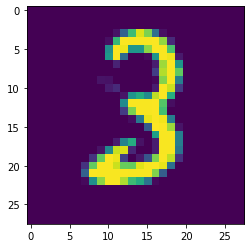

In [60]:
plt.imshow(X_test[0][:,:,0])

In [61]:
testing = X_test[0][:,:,0]
X_test = testing.reshape(1, 28,28,1)
X_test.shape

(1, 28, 28, 1)

In [62]:
test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)
test_generator.fit(X_test)

In [63]:
ans=model.predict_generator(test_generator.flow(X_test), steps=1)

In [64]:
np.argmax(ans, axis=1)

array([3])

array([9])

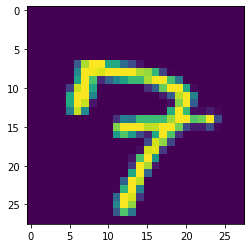

In [65]:
X_test=test.values
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
plt.imshow(X_test[5][:,:,0])
testing = X_test[5][:,:,0]
X_test = testing.reshape(1, 28,28,1)
test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)
test_generator.fit(X_test)
ans=model.predict_generator(test_generator.flow(X_test), steps=1)
np.argmax(ans, axis=1)

array([3])

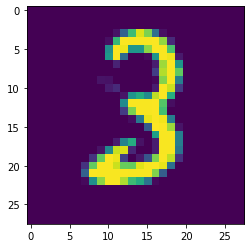

In [67]:
X_test=test.values
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
plt.imshow(X_test[4][:,:,0])
testing = X_test[4][:,:,0]
X_test = testing.reshape(1, 28,28,1)
test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)
test_generator.fit(X_test)
ans=model.predict_generator(test_generator.flow(X_test), steps=1)
np.argmax(ans, axis=1)